# SES SINIFLANDIRMA PROJESİ

### Gerekli kütüphaneler

In [ ]:
# !pip install pydub ffmpeg-python

import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import shutil
import numpy as np

import tensorflow as tf
import keras

from pathlib import Path
from IPython.display import display, Audio


### Ses dosyaları format ayaları

In [ ]:
from pydub import AudioSegment
import os

def convert_m4a_to_wav(input_folder, output_folder, target_sample_rate=16000):
    # Çıktı klasörü yoksa oluştur
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".m4a"):
            # Dosyanın tam yolunu al
            m4a_path = os.path.join(input_folder, filename)
            # .wav dosyası için çıkış yolunu oluştur
            wav_filename = os.path.splitext(filename)[0] + ".wav"
            wav_path = os.path.join(output_folder, wav_filename)

            # M4A dosyasını yükle
            audio = AudioSegment.from_file(m4a_path, format="m4a")
            # Örnekleme hızını 16,000 Hz olarak ayarla
            audio = audio.set_frame_rate(target_sample_rate)
            # WAV formatında kaydet
            audio.export(wav_path, format="wav")
            print(f"Converted {filename} to {wav_filename} with {target_sample_rate} Hz")

input_folder = "/content/drive/MyDrive/Face Detection Videolar/Sesler"  # M4A dosyalarının bulunduğu klasör
output_folder = "/content/Ses_dosyalarımız2"  # WAV dosyalarının kaydedileceği klasör

convert_m4a_to_wav(input_folder, output_folder)


Converted Cankut-05.m4a to Cankut-05.wav with 16000 Hz
Converted Evrim.m4a to Evrim.wav with 16000 Hz
Converted Kaan.m4a to Kaan.wav with 16000 Hz
Converted Merve.m4a to Merve.wav with 16000 Hz
Converted Mehmet.m4a to Mehmet.wav with 16000 Hz
Converted Selin.m4a to Selin.wav with 16000 Hz
Converted Hüseyin.m4a to Hüseyin.wav with 16000 Hz
Converted Taha.m4a to Taha.wav with 16000 Hz
Converted Zeynep.m4a to Zeynep.wav with 16000 Hz


In [ ]:
#16000_pcm_speeches

import os
import shutil

def organize_files_by_name(source_folder, base_output_folder, names):
    # Her bir isim için hedef klasörleri oluştur
    for name in names:
        output_folder = os.path.join(base_output_folder, name)
        os.makedirs(output_folder, exist_ok=True)

    # Klasördeki dosyaları kontrol et
    for filename in os.listdir(source_folder):
        source_file_path = os.path.join(source_folder, filename)

        # Dosyanın isme göre uygun klasöre taşınması
        for name in names:
            if filename.startswith(name):
                shutil.move(source_file_path, os.path.join(base_output_folder, name, filename))
                break  # İlgili dosya taşındığında döngüyü bitir

# Kaynak klasör ve isimler listesi
source_folder = "/content/Ses_dosyalarımız2"  # Dosyaların bulunduğu klasör
base_output_folder = "/content/16000_pcm_speeches/audio"  # Dosyaların taşınacağı ana klasör
names = ["Cankut", "Evrim", "Huseyin","Kaan","Mehmet","Merve","Selin","Taha","Zeynep"]  # İsim listesi, buraya istediğiniz kadar isim ekleyebilirsiniz

organize_files_by_name(source_folder, base_output_folder, names)


In [ ]:
import shutil
import os

def copy_folder(source_folder, destination_folder):
    # Eğer hedef klasör mevcutsa, öncelikle onu silin.
    if os.path.exists(destination_folder):
        shutil.rmtree(destination_folder)
    # Klasörü ve tüm içeriğini kopyala
    shutil.copytree(source_folder, destination_folder)
    print(f"Klasör '{source_folder}' başarıyla '{destination_folder}' konumuna kopyalandı.")

source_folder = "/content/drive/MyDrive/Face Detection Videolar/noise"  # Kopyalamak istediğiniz klasörün yolu
destination_folder = "/content/16000_pcm_speeches/noise"  # Klasörün kopyalanacağı yer

copy_folder(source_folder, destination_folder)


Klasör '/content/drive/MyDrive/Face Detection Videolar/noise' başarıyla '/content/16000_pcm_speeches/noise' konumuna kopyalandı.


In [ ]:
import shutil

def copy_file(source_file, destination_file):
    # Dosyayı kopyala
    shutil.copy2(source_file, destination_file)
    print(f"Dosya '{source_file}' başarıyla '{destination_file}' konumuna kopyalandı.")

source_file = "/content/drive/MyDrive/Face Detection Videolar/tf_Wav_reader.py"  # Kopyalamak istediğiniz dosyanın yolu
destination_file = "/content/16000_pcm_speeches"  # Dosyanın kopyalanacağı yer

copy_file(source_file, destination_file)


Dosya '/content/drive/MyDrive/Face Detection Videolar/tf_Wav_reader.py' başarıyla '/content/16000_pcm_speeches' konumuna kopyalandı.


In [ ]:
from pydub import AudioSegment
import os

def split_and_delete_original_files_in_all_subfolders(base_folder, chunk_length_ms=1000):
    # Base folder içerisindeki tüm alt klasörleri gez
    for root, dirs, files in os.walk(base_folder):
        for filename in files:
            if filename.endswith(".wav"):
                # Dosyanın tam yolunu al
                file_path = os.path.join(root, filename)
                # Dosyayı yükle
                audio = AudioSegment.from_wav(file_path)

                # Parçaları oluştur
                for i in range(0, len(audio), chunk_length_ms):
                    chunk = audio[i:i + chunk_length_ms]
                    chunk_filename = f"{os.path.splitext(filename)[0]}_chunk{i//chunk_length_ms}.wav"
                    chunk_output_path = os.path.join(root, chunk_filename)

                    # Parçayı kaydet
                    chunk.export(chunk_output_path, format="wav")
                    print(f"Exported {chunk_filename}")

                # Orijinal dosyayı sil
                os.remove(file_path)
                print(f"Deleted original file: {filename}")

# Ana klasör yolunu belirleyin
base_folder = "/content/16000_pcm_speeches/audio"  # Ana klasör yolu

split_and_delete_original_files_in_all_subfolders(base_folder)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Exported Evrim_chunk1001.wav
Exported Evrim_chunk1002.wav
Exported Evrim_chunk1003.wav
Exported Evrim_chunk1004.wav
Exported Evrim_chunk1005.wav
Exported Evrim_chunk1006.wav
Exported Evrim_chunk1007.wav
Exported Evrim_chunk1008.wav
Exported Evrim_chunk1009.wav
Exported Evrim_chunk1010.wav
Exported Evrim_chunk1011.wav
Exported Evrim_chunk1012.wav
Exported Evrim_chunk1013.wav
Exported Evrim_chunk1014.wav
Exported Evrim_chunk1015.wav
Exported Evrim_chunk1016.wav
Exported Evrim_chunk1017.wav
Exported Evrim_chunk1018.wav
Exported Evrim_chunk1019.wav
Exported Evrim_chunk1020.wav
Exported Evrim_chunk1021.wav
Exported Evrim_chunk1022.wav
Exported Evrim_chunk1023.wav
Exported Evrim_chunk1024.wav
Exported Evrim_chunk1025.wav
Exported Evrim_chunk1026.wav
Exported Evrim_chunk1027.wav
Exported Evrim_chunk1028.wav
Exported Evrim_chunk1029.wav
Exported Evrim_chunk1030.wav
Exported Evrim_chunk1031.wav
Exported Evrim_chunk1032.wav
Exported Evrim_chunk1033.

In [ ]:
DATASET_ROOT = "16000_pcm_speeches"

# The folders in which we will put the audio samples and the noise samples
AUDIO_SUBFOLDER = "audio"
NOISE_SUBFOLDER = "noise"

DATASET_AUDIO_PATH = os.path.join(DATASET_ROOT, AUDIO_SUBFOLDER)
DATASET_NOISE_PATH = os.path.join(DATASET_ROOT, NOISE_SUBFOLDER)

# Percentage of samples to use for validation
VALID_SPLIT = 0.1

# Seed to use when shuffling the dataset and the noise
SHUFFLE_SEED = 43

# The sampling rate to use.
# This is the one used in all the audio samples.
# We will resample all the noise to this sampling rate.
# This will also be the output size of the audio wave samples
# (since all samples are of 1 second long)
SAMPLING_RATE = 16000

# The factor to multiply the noise with according to:
#   noisy_sample = sample + noise * prop * scale
#      where prop = sample_amplitude / noise_amplitude
SCALE = 0.5

BATCH_SIZE = 128
EPOCHS = 1


In [ ]:
for folder in os.listdir(DATASET_ROOT):
    if os.path.isdir(os.path.join(DATASET_ROOT, folder)):
        if folder in [AUDIO_SUBFOLDER, NOISE_SUBFOLDER]:
            # If folder is `audio` or `noise`, do nothing
            continue
        elif folder in ["other", "_background_noise_"]:
            # If folder is one of the folders that contains noise samples,
            # move it to the `noise` folder
            shutil.move(
                os.path.join(DATASET_ROOT, folder),
                os.path.join(DATASET_NOISE_PATH, folder),
            )
        else:
            # Otherwise, it should be a speaker folder, then move it to
            # `audio` folder
            shutil.move(
                os.path.join(DATASET_ROOT, folder),
                os.path.join(DATASET_AUDIO_PATH, folder),
            )


In [ ]:
# Get the list of all noise files
noise_paths = []
for subdir in os.listdir(DATASET_NOISE_PATH):
    subdir_path = Path(DATASET_NOISE_PATH) / subdir
    if os.path.isdir(subdir_path):
        noise_paths += [
            os.path.join(subdir_path, filepath)
            for filepath in os.listdir(subdir_path)
            if filepath.endswith(".wav")
        ]
if not noise_paths:
    raise RuntimeError(f"Could not find any files at {DATASET_NOISE_PATH}")
print(
    "Found {} files belonging to {} directories".format(
        len(noise_paths), len(os.listdir(DATASET_NOISE_PATH))
    )
)


Found 6 files belonging to 2 directories


In [ ]:
command = (
    "for dir in `ls -1 " + DATASET_NOISE_PATH + "`; do "
    "for file in `ls -1 " + DATASET_NOISE_PATH + "/$dir/*.wav`; do "
    "sample_rate=`ffprobe -hide_banner -loglevel panic -show_streams "
    "$file | grep sample_rate | cut -f2 -d=`; "
    "if [ $sample_rate -ne 16000 ]; then "
    "ffmpeg -hide_banner -loglevel panic -y "
    "-i $file -ar 16000 temp.wav; "
    "mv temp.wav $file; "
    "fi; done; done"
)
os.system(command)


# Split noise into chunks of 16,000 steps each
def load_noise_sample(path):
    sample, sampling_rate = tf.audio.decode_wav(
        tf.io.read_file(path), desired_channels=1
    )
    if sampling_rate == SAMPLING_RATE:
        # Number of slices of 16000 each that can be generated from the noise sample
        slices = int(sample.shape[0] / SAMPLING_RATE)
        sample = tf.split(sample[: slices * SAMPLING_RATE], slices)
        return sample
    else:
        print("Sampling rate for {} is incorrect. Ignoring it".format(path))
        return None


noises = []
for path in noise_paths:
    sample = load_noise_sample(path)
    if sample:
        noises.extend(sample)
noises = tf.stack(noises)

print(
    "{} noise files were split into {} noise samples where each is {} sec. long".format(
        len(noise_paths), noises.shape[0], noises.shape[1] // SAMPLING_RATE
    )
)


6 noise files were split into 354 noise samples where each is 1 sec. long


In [ ]:
def paths_and_labels_to_dataset(audio_paths, labels):
    """Constructs a dataset of audios and labels."""
    path_ds = tf.data.Dataset.from_tensor_slices(audio_paths)
    audio_ds = path_ds.map(
        lambda x: path_to_audio(x), num_parallel_calls=tf.data.AUTOTUNE
    )
    label_ds = tf.data.Dataset.from_tensor_slices(labels)
    return tf.data.Dataset.zip((audio_ds, label_ds))


def path_to_audio(path):
    """Reads and decodes an audio file."""
    audio = tf.io.read_file(path)
    audio, _ = tf.audio.decode_wav(audio, 1, SAMPLING_RATE)
    return audio


def add_noise(audio, noises=None, scale=0.5):
    if noises is not None:
        # Create a random tensor of the same size as audio ranging from
        # 0 to the number of noise stream samples that we have.
        tf_rnd = tf.random.uniform(
            (tf.shape(audio)[0],), 0, noises.shape[0], dtype=tf.int32
        )
        noise = tf.gather(noises, tf_rnd, axis=0)

        # Get the amplitude proportion between the audio and the noise
        prop = tf.math.reduce_max(audio, axis=1) / tf.math.reduce_max(noise, axis=1)
        prop = tf.repeat(tf.expand_dims(prop, axis=1), tf.shape(audio)[1], axis=1)

        # Adding the rescaled noise to audio
        audio = audio + noise * prop * scale

    return audio


def audio_to_fft(audio):
    # Since tf.signal.fft applies FFT on the innermost dimension,
    # we need to squeeze the dimensions and then expand them again
    # after FFT
    audio = tf.squeeze(audio, axis=-1)
    fft = tf.signal.fft(
        tf.cast(tf.complex(real=audio, imag=tf.zeros_like(audio)), tf.complex64)
    )
    fft = tf.expand_dims(fft, axis=-1)

    # Return the absolute value of the first half of the FFT
    # which represents the positive frequencies
    return tf.math.abs(fft[:, : (audio.shape[1] // 2), :])


# Get the list of audio file paths along with their corresponding labels

class_names = os.listdir(DATASET_AUDIO_PATH)
print(
    "Our class names: {}".format(
        class_names,
    )
)

audio_paths = []
labels = []
for label, name in enumerate(class_names):
    print(
        "Processing speaker {}".format(
            name,
        )
    )
    dir_path = Path(DATASET_AUDIO_PATH) / name
    speaker_sample_paths = [
        os.path.join(dir_path, filepath)
        for filepath in os.listdir(dir_path)
        if filepath.endswith(".wav")
    ]
    audio_paths += speaker_sample_paths
    labels += [label] * len(speaker_sample_paths)

print(
    "Found {} files belonging to {} classes.".format(len(audio_paths), len(class_names))
)

# Shuffle
rng = np.random.RandomState(SHUFFLE_SEED)
rng.shuffle(audio_paths)
rng = np.random.RandomState(SHUFFLE_SEED)
rng.shuffle(labels)

# Split into training and validation
num_val_samples = int(VALID_SPLIT * len(audio_paths))
print("Using {} files for training.".format(len(audio_paths) - num_val_samples))
train_audio_paths = audio_paths[:-num_val_samples]
train_labels = labels[:-num_val_samples]

print("Using {} files for validation.".format(num_val_samples))
valid_audio_paths = audio_paths[-num_val_samples:]
valid_labels = labels[-num_val_samples:]

# Create 2 datasets, one for training and the other for validation
train_ds = paths_and_labels_to_dataset(train_audio_paths, train_labels)
train_ds = train_ds.shuffle(buffer_size=BATCH_SIZE * 8, seed=SHUFFLE_SEED).batch(
    BATCH_SIZE
)

valid_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
valid_ds = valid_ds.shuffle(buffer_size=32 * 8, seed=SHUFFLE_SEED).batch(32)


# Add noise to the training set
train_ds = train_ds.map(
    lambda x, y: (add_noise(x, noises, scale=SCALE), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# Transform audio wave to the frequency domain using `audio_to_fft`
train_ds = train_ds.map(
    lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

valid_ds = valid_ds.map(
    lambda x, y: (audio_to_fft(x), y), num_parallel_calls=tf.data.AUTOTUNE
)
valid_ds = valid_ds.prefetch(tf.data.AUTOTUNE)


Our class names: ['Zeynep', 'Cankut', 'Jens_Stoltenberg', 'Julia_Gillard', 'Nelson_Mandela', 'Benjamin_Netanyau', 'Magaret_Tarcher']
Processing speaker Zeynep
Processing speaker Cankut
Processing speaker Jens_Stoltenberg
Processing speaker Julia_Gillard
Processing speaker Nelson_Mandela
Processing speaker Benjamin_Netanyau
Processing speaker Magaret_Tarcher
Found 7918 files belonging to 7 classes.
Using 7127 files for training.
Using 791 files for validation.


In [ ]:
def residual_block(x, filters, conv_num=3, activation="relu"):
    # Shortcut
    s = keras.layers.Conv1D(filters, 1, padding="same")(x)
    for i in range(conv_num - 1):
        x = keras.layers.Conv1D(filters, 3, padding="same")(x)
        x = keras.layers.Activation(activation)(x)
    x = keras.layers.Conv1D(filters, 3, padding="same")(x)
    x = keras.layers.Add()([x, s])
    x = keras.layers.Activation(activation)(x)
    return keras.layers.MaxPool1D(pool_size=2, strides=2)(x)


def build_model(input_shape, num_classes):
    inputs = keras.layers.Input(shape=input_shape, name="input")

    x = residual_block(inputs, 16, 2)
    x = residual_block(x, 32, 2)
    x = residual_block(x, 64, 3)
    x = residual_block(x, 128, 3)
    x = residual_block(x, 128, 3)

    x = keras.layers.AveragePooling1D(pool_size=3, strides=3)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(256, activation="relu")(x)
    x = keras.layers.Dense(128, activation="relu")(x)

    outputs = keras.layers.Dense(num_classes, activation="softmax", name="output")(x)

    return keras.models.Model(inputs=inputs, outputs=outputs)


model = build_model((SAMPLING_RATE // 2, 1), len(class_names))

model.summary()

# Compile the model using Adam's default learning rate
model.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# Add callbacks:
# 'EarlyStopping' to stop training when the model is not enhancing anymore
# 'ModelCheckPoint' to always keep the model that has the best val_accuracy
model_save_filename = "model.keras"

earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
mdlcheckpoint_cb = keras.callbacks.ModelCheckpoint(
    model_save_filename, monitor="val_accuracy", save_best_only=True
)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 8000, 1)        │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_37 (Conv1D)        │ (None, 8000, 16)       │             64 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_26             │ (None, 8000, 16)       │              0 │ conv1d_37[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_38 (Conv1D)        │ (None, 8000, 16)       │            784 │ activation_26[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_36 (Conv1D)        │ (None, 8000, 16)       │             32 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 8000, 16)       │              0 │ conv1d_38[0][0],       │
│                           │                        │                │ conv1d_36[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_27             │ (None, 8000, 16)       │              0 │ add_10[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_10          │ (None, 4000, 16)       │              0 │ activation_27[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_40 (Conv1D)        │ (None, 4000, 32)       │          1,568 │ max_pooling1d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_28             │ (None, 4000, 32)       │              0 │ conv1d_40[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_41 (Conv1D)        │ (None, 4000, 32)       │          3,104 │ activation_28[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_39 (Conv1D)        │ (None, 4000, 32)       │            544 │ max_pooling1d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_11 (Add)              │ (None, 4000, 32)       │              0 │ conv1d_41[0][0],       │
│                           │                        │                │ conv1d_39[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 4000, 32)       │              0 │ add_11[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_11          │ (None, 2000, 32)       │              0 │ activation_29[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_43 (Conv1D)   

 Total params: 3,088,855 (11.78 MB)

 Trainable params: 3,088,855 (11.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=valid_ds,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb],
)


76/76 ━━━━━━━━━━━━━━━━━━━━ 666s 8s/step - accuracy: 0.3803 - loss: 2.1531 - val_accuracy: 0.8784 - val_loss: 0.3774


In [ ]:
print(model.evaluate(valid_ds))


34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 538ms/step - accuracy: 0.8913 - loss: 0.3488
[0.3773621916770935, 0.8783910274505615]


In [ ]:
SAMPLES_TO_DISPLAY = 10

test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
test_ds = test_ds.shuffle(buffer_size=BATCH_SIZE * 8, seed=SHUFFLE_SEED).batch(
    BATCH_SIZE
)

test_ds = test_ds.map(
    lambda x, y: (add_noise(x, noises, scale=SCALE), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)

for audios, labels in test_ds.take(1):
    # Get the signal FFT
    ffts = audio_to_fft(audios)
    # Predict
    y_pred = model.predict(ffts)
    # Take random samples
    rnd = np.random.randint(0, BATCH_SIZE, SAMPLES_TO_DISPLAY)
    audios = audios.numpy()[rnd, :, :]
    labels = labels.numpy()[rnd]
    y_pred = np.argmax(y_pred, axis=-1)[rnd]

    for index in range(SAMPLES_TO_DISPLAY):
        # For every sample, print the true and predicted label
        # as well as run the voice with the noise
        print(
            "Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
                "[92m" if labels[index] == y_pred[index] else "[91m",
                class_names[labels[index]],
                "[92m" if labels[index] == y_pred[index] else "[91m",
                class_names[y_pred[index]],
            )
        )
        display(Audio(audios[index, :, :].squeeze(), rate=SAMPLING_RATE))


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 660ms/step
Speaker: Cankut	Predicted: Cankut


Speaker: Huseyin	Predicted: Huseyin


Speaker: Taha	Predicted: Taha


Speaker: Mehmet	Predicted: Mehmet


Speaker: Merve	Predicted: Merve


Speaker: Taha	Predicted: Taha


Speaker: Evrim	Predicted: Evrim


Speaker: Kaan	Predicted: Kaan


Speaker: Zeynep	Predicted: Zeynep


Speaker: Taha	Predicted: Taha


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 841ms/step


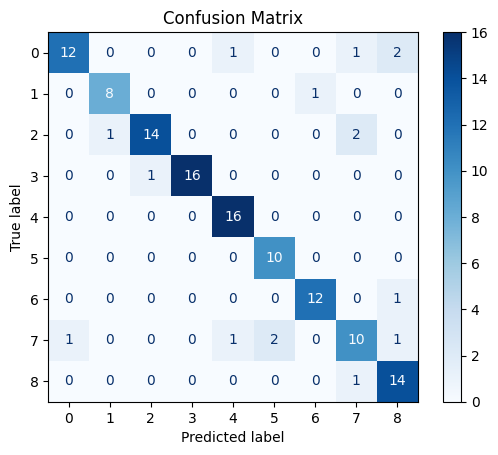

Speaker: Mehmet	Predicted: Mehmet
Speaker: Zeynep	Predicted: Zeynep
Speaker: Zeynep	Predicted: Zeynep
Speaker: Merve	Predicted: Merve
Speaker: Evrim	Predicted: Evrim
Speaker: Evrim	Predicted: Evrim
Speaker: Zeynep	Predicted: Zeynep
Speaker: Evrim	Predicted: Evrim
Speaker: Kaan	Predicted: Kaan
Speaker: Taha	Predicted: Huseyin


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Tahminler ve gerçek etiketler için listeler oluştur
y_true = []
y_pred = []

test_ds = paths_and_labels_to_dataset(valid_audio_paths, valid_labels)
test_ds = test_ds.shuffle(buffer_size=BATCH_SIZE * 8, seed=SHUFFLE_SEED).batch(BATCH_SIZE)

test_ds = test_ds.map(
    lambda x, y: (add_noise(x, noises, scale=SCALE), y),
    num_parallel_calls=tf.data.AUTOTUNE,
)

for audios, labels in test_ds.take(1):
    # Get the signal FFT
    ffts = audio_to_fft(audios)
    # Predict
    predictions = model.predict(ffts)
    # Collect true and predicted labels
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=-1))

# Confusion matrix oluşturma
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Örnekleri rastgele seçerek görselleştirme (İsteğe bağlı)
SAMPLES_TO_DISPLAY = 10
rnd = np.random.randint(0, BATCH_SIZE, SAMPLES_TO_DISPLAY)

for index in rnd:
    # For every sample, print the true and predicted label
    print(
        "Speaker:\33{} {}\33[0m\tPredicted:\33{} {}\33[0m".format(
            "[92m" if y_true[index] == y_pred[index] else "[91m",
            class_names[y_true[index]],
            "[92m" if y_true[index] == y_pred[index] else "[91m",
            class_names[y_pred[index]],
        )
    )


In [ ]:
# Modeli .h5 formatında kaydetmek
model.save("my_model.keras")


In [ ]:
from tensorflow.keras.models import load_model

# .h5 formatında kaydedilmiş model
model = load_model("my_model.keras")

# Veya TensorFlow'un yerel formatında kaydedilmiş model
model = load_model("my_model.keras")


In [ ]:
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write

# Parametreler
samplerate = 16000  # Örnekleme hızı (Hz)
duration = 3  # Kayıt süresi (saniye)
filename = 'realtime_audio.wav'

# Mikrofon ile kayıt
print("Recording...")
recording = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1)
sd.wait()  # Kayıt tamamlanana kadar bekle
write(filename, samplerate, recording)  # Kaydı dosyaya kaydet
print("Recording complete.")

# Kaydedilen sesi işle ve tahmin yap
processed_audio = process_audio(filename)
prediction = model.predict(processed_audio)
predicted_class = np.argmax(prediction, axis=-1)

print(f"Predicted Class: {predicted_class}")
